In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
import glob
import numpy as np

In [197]:

pd.DataFrame(ref).rolling(rollingMean).mean().fillna(0)


NameError: name 'rollingMean' is not defined

In [269]:
def getFromMca(mca):
    f=open(mca,"r")
    d=f.read()
    f.close()

    data=[]
    for a in d.split("\n",32)[32].splitlines():
        data.append(int(a))
    return(data)

def gainFromMca(pathDemo,pathRef,rollingMean):
    ref=getFromMca(pathRef)
    demo=getFromMca(pathDemo)
    
    ref =np.array(pd.DataFrame(ref).rolling(rollingMean).mean().fillna(0))
    demo=np.array(pd.DataFrame(demo).rolling(rollingMean).mean().fillna(0))
    
    gain=[]
    for a in range(len(ref)):
        if ref[a]!=0:
            gain.append(demo[a]/ref[a])
        else:
            if demo[a]==0:
                gain.append(0)
            else:
                gain.append(0)
    return(np.nan_to_num(gain))

In [167]:
gainAll={}
for name in glob.glob(r"gain_data\Demo_823\*.mca"):
    gainAll[name]=gainFromMca(name,name.replace("Demo_823","Ref_742"))

d:\dp\qt_playing\venv\lib\site-packages\numpy\lib\type_check.py:498: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = _nx.array(x, subok=True, copy=copy)


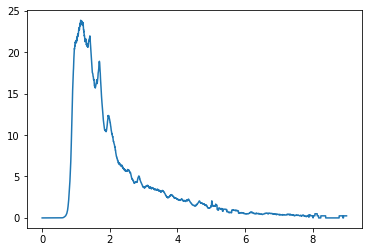

In [250]:
gainAll={}
for u in usable:
    name=("gain_data\\Demo_823\\"+str(u)+".mca")
    gainAll[name]=gainFromMca(name,name.replace("Demo_823","Ref_742"),30)

al=np.zeros(8192)
for g in gainAll:
    al=al+np.array(gainAll[g])
al=al/4
al[0:150]=0
plt.plot(np.arange(0,(30-co),(30-co)/len(sp))[0:ra],al[0:ra],label=name)

In [266]:
name

'14'

d:\dp\qt_playing\venv\lib\site-packages\numpy\lib\type_check.py:498: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = _nx.array(x, subok=True, copy=copy)


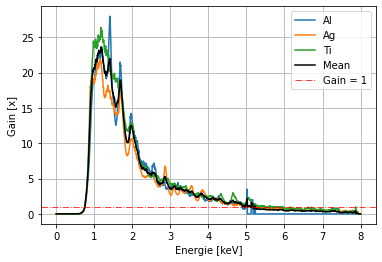

In [293]:
usable=[102,105,107]

target={102:"Al",105:"Ag",107:"Ti", 14:"Ti"}
ra=round(8/0.003662109375)   

# Load mca data
gainAll={}
for u in usable:
    name=("gain_data\\Demo_823\\"+str(u)+".mca")
    gainAll[name]=gainFromMca(name,name.replace("Demo_823","Ref_742"),30)

# generate separate graphs for targets
for g in gainAll:
    gain=gainAll[g]
    gain[0:150]=0
    name=g.replace("gain_data\\Demo_823\\","").replace(".mca","")
    plt.plot(np.arange(0,(30-co),(30-co)/len(sp))[0:ra],gain[0:ra],label=target[int(name)])
    plt.grid()
    plt.legend()
    plt.ylabel("Gain [x]")
    plt.xlabel("Energie [keV]")
    plt.savefig(f"gain/{target[int(name)]}_{name}.png",format="png",dpi=400)
    plt.savefig(f"gain/{target[int(name)]}_{name}.pdf",format="pdf")
    plt.cla()
    plt.close()
    
# generate data for axis
for g in gainAll:
    gain=gainAll[g]
    gain[0:150]=0
    name=g.replace("gain_data\\Demo_823\\","").replace(".mca","")
    plt.plot(np.arange(0,(30-co),(30-co)/len(sp))[0:ra],gain[0:ra],label=target[int(name)])

# generate mean of data
al=np.zeros(8192)
for g in gainAll:
    al=al+np.array(gainAll[g])
al=al/len(usable)
al[0:150]=0
plt.plot(np.arange(0,(30-co),(30-co)/len(sp))[0:ra],al[0:ra],label="Mean", color="Black")
    
# Save graph
plt.axhline(y=1, ls='-.',color="red",linewidth=1,alpha=0.75,label="Gain = 1")
plt.grid()
plt.legend()
plt.ylabel("Gain [x]")
plt.xlabel("Energie [keV]")
plt.savefig(f"gain/all_{name}.png",format="png",dpi=400)
plt.savefig(f"gain/all_{name}.pdf",format="pdf")

In [257]:
usable=[14,102,105]
usable=usable+(list(range(107,117)))

ra=round(9/0.003662109375)   
co=0

gainAll={}
for name in glob.glob(r"gain_data\Demo_823\*.mca"):
    demo=getFromMca(name)
    ref=getFromMca(name.replace("Demo_823","Ref_742"))
    plt.plot(np.arange(0,(30-co),(30-co)/len(sp))[0:ra],pd.DataFrame(demo[0:ra]).rolling(15).mean(),label="demo")
    plt.plot(np.arange(0,(30-co),(30-co)/len(sp))[0:ra],pd.DataFrame(ref[0:ra]).rolling(15).mean(),label="ref")
    
    name=name.replace("gain_data\\Demo_823\\","").replace(".mca","")
    plt.grid()
    plt.legend()
    plt.yscale("log")
    plt.ylabel("Intensity")
    plt.xlabel("keV")
    plt.savefig(f"mca/{name}.png",format="png",dpi=100)
    plt.cla()
    plt.close()

No handles with labels found to put in legend.


Text(0.5, 0, 'keV')

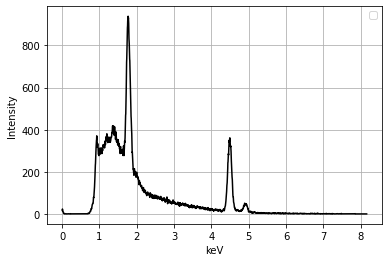

In [5]:
mca=r"107_demo.mca"
f=open(mca,"r")
d=f.read()
f.close()

sp=[]
for a in d.split("\n",32)[32].splitlines():
    sp.append(int(a))
ra=round(8/0.003662109375)   
co=-0.6

plt.plot(np.arange(0,(30-co),(30-co)/len(sp))[0:ra],pd.DataFrame(sp[0:ra]).rolling(3).mean(),color="black")


plt.legend()
plt.grid()
plt.ylabel("Intensity")
plt.xlabel("keV")